<a href="https://colab.research.google.com/github/MarshaKamsteeg/TM10007_Machine_Learning_Group_Assignment/blob/main/tm10007_group_9_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment

In [ ]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

## Description of data set

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [ ]:
# Import Data
from adni.load_data import load_data
import numpy as np
import pandas as pd

# Import Data
data = load_data()
data_pandas = pd.DataFrame(data)
print(f'Total number of samples: {len(data.index)}')
print(f'Total number of columns: {len(data.columns)}')
print(f'Total amount of features: {len(data.columns)-2}')

# Find empty / NaN entry in pandas dataframe
data_pandas = data_pandas.replace(' ', np.nan) 
empty_values = np.where(pd.isnull(data_pandas))

if ~empty_values[0] == []:
  print(f'Empty values can be found at index {empty_values}')
else:
  print('There are no empty values found.')
  pass

# Percentage AD and CN
number_AD = data_pandas['label'].value_counts()['AD']
number_CN = data_pandas['label'].value_counts()['CN']
print(f"Within the dataset {number_AD} samples are from people with Alzheimer Disease")
print(f"The other {number_CN} samples are from people without Alzheimer Disease") 


Total number of samples: 855
Total number of columns: 268
Total amount of features: 266
There are no empty values found.
Within the dataset 519 samples are from people with Alzheimer Disease
The other 336 samples are from people without Alzheimer Disease


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


# Preprocessing of the data

## Dividing data in a designgset (80%) and testset (20%)

In [ ]:
# import modules
from sklearn.model_selection import train_test_split

# Divide data in label and feature set 
labels = data['label']
features = data.drop(columns=['label'])

# Divide data in trainingsset (80%) and testset (20%) stratified for the label
data_designset, data_testset, label_designset, label_testset = train_test_split(features, labels, test_size=.2, random_state=1, stratify=data['label'])

# Check the stratification 
percent_AD_train = (label_designset.value_counts()['AD'])/len(label_designset)*100
percent_CN_train = (label_designset.value_counts()['CN'])/len(label_designset)*100
percent_AD_test = (label_testset.value_counts()['AD'])/len(label_testset)*100
percent_CN_test = (label_testset.value_counts()['CN'])/len(label_testset)*100

print(f"{percent_AD_train:.2f}% of the train data are Alzheimer disease samples.")
print(f"{percent_CN_train:.2f}% of the train data are control samples.")
print(f"{percent_AD_test:.2f}% of the test data are Alzheimer disease samples.")
print(f"{percent_CN_test:.2f}% of the test data are control samples.")


60.67% of the train data are Alzheimer disease samples.
39.33% of the train data are control samples.
60.82% of the test data are Alzheimer disease samples.
39.18% of the test data are control samples.


## Feature Dropping

In [ ]:
# Find columns where >90% of the column has value zero. Remove this feature if this is true
data_designset.drop(columns=data_designset.columns[data_designset.eq(0).mean()>0.9])

,hf_energy,hf_entropy,hf_kurtosis,hf_max,hf_mean,hf_median,hf_min,hf_peak,hf_quartile_range,hf_range,...,"vf_Frangi_inner_kurtosis_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_max_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_mean_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_median_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_min_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_peak_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_quartile_range_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_range_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_skewness_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_std_SR(1.0, 10.0)_SS2.0"
ID,,,,,,,,,,,,,,,,,,,,,
0_016_S_4009_bl_0,620.338163,5.128957,-0.135256,1.231229,0.644556,0.745517,-0.260302,204,0.479143,1.491532,...,4.508531,1.300122e-09,4.311395e-10,3.479244e-10,1.539406e-10,7,2.356782e-10,1.146181e-09,2.063715,3.011985e-10
0_141_S_0767_bl_0,921.747797,4.448338,3.140272,1.566359,1.052297,1.080785,0.209751,179,0.295765,1.356608,...,-3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
0_018_S_4349_bl_0,15722.331725,4.354226,3.090342,2.313908,1.753796,1.749090,1.072839,364,0.260229,1.241069,...,-1.500000,1.987360e-10,1.478404e-10,1.602012e-10,8.606723e-11,1,5.868167e-11,1.126688e-10,-0.364345,4.870408e-11
0_127_S_4940_bl_0,1566.455496,5.175812,-1.474096,1.551087,0.632457,0.729728,-0.280274,208,1.170020,1.831361,...,0.439466,4.473136e-09,1.307038e-09,8.259568e-10,8.706174e-11,27,1.505578e-09,4.386074e-09,1.204938,1.249381e-09
0_011_S_0021_bl_0,1396.801137,4.310042,4.281509,1.639478,1.133137,1.132616,0.575885,243,0.275302,1.063593,...,-3.000000,4.839984e-14,4.839984e-14,4.839984e-14,4.839984e-14,1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_009_S_0842_bl_0,3757.368887,4.508431,4.883810,2.129794,1.444995,1.502802,-0.076841,434,0.369507,2.206635,...,1.266101,1.265295e-09,3.796334e-10,3.352694e-10,3.160450e-11,14,3.722508e-10,1.233690e-09,1.185341,2.881653e-10
0_100_S_5075_bl_0,12942.678777,4.426823,3.389407,2.250390,1.774349,1.816222,0.936545,317,0.261290,1.313845,...,-3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
0_070_S_4719_bl_0,1607.410337,4.862292,-0.113694,1.596243,0.961981,1.131252,-0.151707,290,0.609169,1.747950,...,0.866371,1.941420e-10,5.489328e-11,3.371375e-11,3.614827e-14,2,6.423807e-11,1.941059e-10,1.408913,6.653018e-11


# Cross validation
Code hieronder is nested cross-validatie toegepast op een k-NN classifier (met verdeling outerloop training:test = 90:10 en verdeling innerloop training:validatie = 90:10).

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# configure the cross-validation procedure
skf = StratifiedKFold(n_splits = 5, random_state=None)
results = []
for train_idx, val_idx in skf.split(data_designset,label_designset):
  # split data
  X_train, X_val = data_designset[train_idx], data_designset[val_idx]
  y_train, y_val = label_designset[train_idx], label_designset[val_idx]


Best classifier: k=15
Best classifier: k=21
Best classifier: k=11
Best classifier: k=9
Best classifier: k=13
Best classifier: k=13
Best classifier: k=23
Best classifier: k=11
Best classifier: k=13
Best classifier: k=17
The optimal N=13


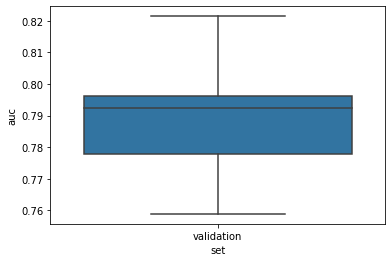

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn import neighbors, metrics
import seaborn

# Create a X fold stratified CV iterator
cv_outer = StratifiedKFold(n_splits=10)
results = []
best_n_neighbors = []

# Loop over the folds
for validation_index, test_index in cv_outer.split(features, labels):
    
		# Split the data properly
    data_train_val = features.to_numpy()[validation_index]
    label_train_val = labels.to_numpy()[validation_index]
   
    data_test = features.to_numpy()[test_index]
    label_test = labels.to_numpy()[test_index]

    # Check the stratification 
    # percent_AD_train = (label_train_val == 'AD').sum()/len(label_train_val)*100
    # percent_CN_train = (label_train_val == 'CN').sum()/len(label_train_val)*100
    # percent_AD_test = (label_test == 'AD').sum()/len(label_test)*100
    # percent_CN_test = (label_test == 'CN').sum()/len(label_test)*100
    # print(f"{percent_AD_train:.2f}% of the train data are Alzheimer disease samples.")
    # print(f"{percent_CN_train:.2f}% of the train data are control samples.")
    # print(f"{percent_AD_test:.2f}% of the test data are Alzheimer disease samples.")
    # print(f"{percent_CN_test:.2f}% of the test data are control samples.")
    
    # Create a grid search to find the optimal k using a gridsearch and 10-fold cross validation
    # Same as above
    parameters = {"n_neighbors": list(range(1, 26, 2))}
    knn = neighbors.KNeighborsClassifier()
    cv_inner = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(knn, parameters, cv=cv_inner.split(data_train_val, label_train_val), scoring='accuracy')
    grid_search.fit(data_train_val, label_train_val)
    
    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier: k={clf.n_neighbors}')
    best_n_neighbors.append(clf.n_neighbors)

# 		# Test the classifier on the test data
#     probabilities = clf.predict_proba(data_test)
#     scores = probabilities[:, 1]
    
#     # Get the auc
#     auc = metrics.roc_auc_score(label_test, scores)
#     results.append({
#         'auc': auc,
#         'k': clf.n_neighbors,
#         'set': 'test'
#     })
    
    # Test the classifier on the validation data
    probabilities_train_val = clf.predict_proba(data_train_val)
    scores_train_val = probabilities_train_val[:, 1]
    
    # Get the auc
    auc_validation = metrics.roc_auc_score(label_train_val, scores_train_val)
    results.append({
        'auc': auc_validation,
        'k': clf.n_neighbors,
        'set': 'validation'
    })
# Create results dataframe and plot it
results = pd.DataFrame(results)
seaborn.boxplot(y='auc', x='set', data=results)

optimal_n = int(np.median(best_n_neighbors))
print(f"The optimal N={optimal_n}")

### Univariate Feature Selection 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
bestfeatures = SelectKBest(score_func=f_classif, k=261)
fit = bestfeatures.fit(data_designset, label_designset)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_designset.columns)

#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values('Score')
print(featureScores.nlargest(50,'Score'))  #printing 10 best features
scores = featureScores['Score'].tonumpy()
print(scores)
plt.plot(scores)
plt.show

                                         Specs       Score
1                                   hf_entropy  487.204831
2                                  hf_kurtosis  386.354822
224                          tf_LBP_std_R3_P12  356.877527
8                            hf_quartile_range  356.192050
11                                      hf_std  335.410993
117                  tf_GLRLM_ShortRunEmphasis  297.952073
228                        tf_NGTDM_Complexity  297.678975
106                 tf_GLRLM_GrayLevelVariance  287.360495
105  tf_GLRLM_GrayLevelNonUniformityNormalized  287.360495
119      tf_GLRLM_ShortRunLowGrayLevelEmphasis  275.733263
76              phasef_phasesym_entropy_WL3_N5  240.930317
140                      tf_Gabor_0.05A0.0skew  222.475894
115                     tf_GLRLM_RunPercentage  199.004089
229                          tf_NGTDM_Contrast  197.679472
108                   tf_GLRLM_LongRunEmphasis  192.793747
6                                       hf_min  189.2568

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 68  69  80  81 214 217 219] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


AttributeError: ignored

# Classifiers
## PCA

In [ ]:
# General Import
from sklearn.decomposition import PCA

# Create a PCA which retains n principle components
n_pca = 5
pca = PCA(n_components=n_pca)

# Fit the PCA model, point_data_train should be a 2D numpy array
# which has one row per subject and the pointdata as columns where
# the columns are x1, y1, z1, x2, y2, z2, ..., xn, yn, zn
pca.fit(data_trainset)

# Transform data
data_trainset_trans = pca.transform(data_trainset)


## Scaling

In [ ]:
# Different methods for feature scaling. Decision will be made after usage of PCA
# Import modules
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

x_train = data_designset
x_train_stand = x_train.copy()

# Robust scaler - based on percentiles. Not influenced by a few number of very large marginal outliers
trans = RobustScaler()
x_train_robust = trans.fit_transform(x_train)

# Standard scaler - removes the mean and scales the data to unit variance
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)

# MinMax scaler - rescales data set such that all feature values are in range [0,1]
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
